In [251]:
import numpy as np
import pandas as pd
import os
import yahooquery
from pandas_datareader import data
!pip install nltk==3.3
from datetime import timedelta, date, datetime

# Get historical stock data

In [252]:
# Get historical data
symbol = 'AAPL'
ticker = yahooquery.Ticker(symbol)
df = pd.DataFrame(ticker.history(start='2020-06-01', end='2021-01-29'))

In [253]:
df=data.DataReader("AAPL", 'yahoo', '20200601', '20210129').reset_index()
df = df[['Date','Adj Close', 'Volume']]
(df[:10].style.format(dict(Date='{:%d/%m/%Y}'))
 .background_gradient(subset='Volume',cmap='Blues')
 .background_gradient(subset='Adj Close',cmap='Blues')
)

,Date,Adj Close,Volume
0,01/06/2020,80.059723,80791200.000000
1,02/06/2020,80.430351,87642800.000000
2,03/06/2020,80.873131,104491200.000000
3,04/06/2020,80.176636,87560400.000000
4,05/06/2020,82.460152,137250400.000000
5,08/06/2020,82.947685,95654400.000000
6,09/06/2020,85.567009,147712400.000000
7,10/06/2020,87.768440,166651600.000000
8,11/06/2020,83.554642,201662400.000000
9,12/06/2020,84.276009,200146000.000000


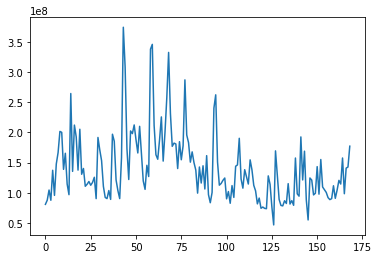

In [254]:
df.Volume.plot()

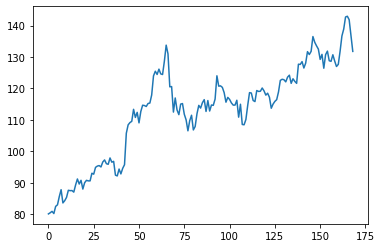

In [255]:
df["Adj Close"].plot()

In [256]:
dates = pd.DataFrame(pd.date_range('20200601',periods=8*31))

In [257]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)
df = df.drop(['Date'], axis=1)

In [258]:
stock_file = pd.read_csv("./earnings_data/AAPL.csv")

In [259]:
stock_file.set_index(pd.to_datetime(stock_file['Date']), inplace=True)

In [260]:
stock_file.drop('Date', axis=1)

,Period Ending,Estimated_EPS,Reported_EPS,Surprise_EPS,Estimated_Revenue,Reported_Revenue
Date,,,,,,
2021-01-27,2020-12-01,1.41,1.68,0.27,102512.80,111439.0
2020-10-29,2020-09-01,0.69,0.73,0.04,63388.91,64698.0
2020-07-30,2020-06-01,0.51,0.65,0.14,51935.15,59685.0
2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
2020-01-28,2019-12-01,1.14,1.25,0.11,88017.80,91819.0
2019-10-30,2019-09-01,0.71,0.76,0.05,62724.50,64040.0
2019-07-30,2019-06-01,0.53,0.55,0.02,53313.88,53809.0
2019-04-30,2019-03-01,0.59,0.62,0.03,57553.77,58015.0
2019-01-29,2018-12-01,1.04,1.05,0.01,84071.09,84310.0


In [261]:
stock_file = stock_file.reindex(df.index, method='bfill')
#stock_file = stock_file.drop('Date', axis=1)
#stock_file = stock_file.drop('Period Ending', axis=1)

In [262]:
print(stock_file)

                  Date Period Ending  Estimated_EPS  Reported_EPS  \
Date                                                                
2020-06-01  2020-04-30    2020-03-01           0.52          0.64   
2020-06-02  2020-04-30    2020-03-01           0.52          0.64   
2020-06-03  2020-04-30    2020-03-01           0.52          0.64   
2020-06-04  2020-04-30    2020-03-01           0.52          0.64   
2020-06-05  2020-04-30    2020-03-01           0.52          0.64   
...                ...           ...            ...           ...   
2021-01-25  2020-10-29    2020-09-01           0.69          0.73   
2021-01-26  2020-10-29    2020-09-01           0.69          0.73   
2021-01-27  2021-01-27    2020-12-01           1.41          1.68   
2021-01-28  2021-01-27    2020-12-01           1.41          1.68   
2021-01-29  2021-01-27    2020-12-01           1.41          1.68   

            Surprise_EPS  Estimated_Revenue  Reported_Revenue  
Date                                  

In [263]:
df = df.join(stock_file)

In [264]:
df

,Adj Close,Volume,Date,Period Ending,Estimated_EPS,Reported_EPS,Surprise_EPS,Estimated_Revenue,Reported_Revenue
Date,,,,,,,,,
2020-06-01,80.059723,80791200.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
2020-06-02,80.430351,87642800.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
2020-06-03,80.873131,104491200.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
2020-06-04,80.176636,87560400.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
2020-06-05,82.460152,137250400.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0
...,...,...,...,...,...,...,...,...,...
2021-01-25,142.706757,157611700.0,2020-10-29,2020-09-01,0.69,0.73,0.04,63388.91,64698.0
2021-01-26,142.946396,98390600.0,2020-10-29,2020-09-01,0.69,0.73,0.04,63388.91,64698.0
2021-01-27,141.848038,140843800.0,2021-01-27,2020-12-01,1.41,1.68,0.27,102512.80,111439.0


# Get news sentiment

In [265]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2020, 6, 1)
end_date = date(2021, 1, 29)
data = []
run_Dict = []
for single_date in daterange(start_date, end_date):
    daily_news = ticker.news(start=single_date.strftime("%Y-%m-%d"))
    for article in daily_news:
        #print(article)
        title = article['title']
        if title in run_Dict:
            continue
        else:
            try:
                run_Dict.append(title)
                publisher_time = article['provider_publish_time']
                publisher_time = datetime.utcfromtimestamp(int(publisher_time)).strftime('%Y-%m-%d')
                data.append([publisher_time, title, article['summary']])
            except KeyError:
                print("KeyError generated.")
                continue
        if len(run_Dict) > 30:
            run_Dict = run_Dict[-30:]
print(len(data))

999


In [266]:
news = pd.DataFrame(data, columns=["date", "Title", "Summary"])

In [267]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download("vader_lexicon")
sentimentAnalyser = SentimentIntensityAnalyzer()
news["compound"] = [sentimentAnalyser.polarity_scores(v)['compound'] for v in news["Summary"]]
news["negative"] = [sentimentAnalyser.polarity_scores(v)['neg'] for v in news["Summary"]]
news["positive"] = [sentimentAnalyser.polarity_scores(v)['pos'] for v in news["Summary"]]
news["neutral"] = [sentimentAnalyser.polarity_scores(v)['neu'] for v in news["Summary"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/muditj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [268]:
news = news.sort_values(by="date")

In [269]:
print(news)

           date                                              Title  \
24   2020-05-08  I think a ‘square-root’ recovery is more likel...   
23   2020-05-08   94% of self-isolating families own at least o...   
22   2020-05-08  Stocks jump despite a record 20.5M jobs lost i...   
21   2020-05-11  Yahoo Finance Presents: Dropbox Founder & CEO ...   
20   2020-05-11  Contract tracing and preserving privacy: Mozil...   
..          ...                                                ...   
981  2021-01-28  War on Wall Street, GDP & Jobless Claims, Earn...   
979  2021-01-28      Apple (AAPL) Q1 2021 Earnings Call Transcript   
978  2021-01-28  Dow Futures Edge Higher, Market Volatility Spi...   
988  2021-01-28  Apple logs record quarterly smartphone shipmen...   
832  2021-01-29  Samsung Galaxy S21 vs Apple iPhone 12: Which n...   

                                               Summary  compound  negative  \
24   Director of Fiscal Policy at the American Acti...   -0.4902     0.075   
23 

In [270]:
news_sentiment = news[['date', 'compound']]

In [271]:
print(news_sentiment)

           date  compound
24   2020-05-08   -0.4902
23   2020-05-08    0.0000
22   2020-05-08    0.0000
21   2020-05-11    0.4939
20   2020-05-11    0.8176
..          ...       ...
981  2021-01-28    0.0000
979  2021-01-28    0.0000
978  2021-01-28   -0.1531
988  2021-01-28    0.5267
832  2021-01-29    0.0000

[999 rows x 2 columns]


In [272]:
news_sentiment.set_index(pd.to_datetime(news_sentiment['date']), inplace=True)

In [273]:
print(news_sentiment[:10])

                  date  compound
date                            
2020-05-08  2020-05-08   -0.4902
2020-05-08  2020-05-08    0.0000
2020-05-08  2020-05-08    0.0000
2020-05-11  2020-05-11    0.4939
2020-05-11  2020-05-11    0.8176
2020-05-11  2020-05-11    0.0000
2020-05-12  2020-05-12    0.0000
2020-05-12  2020-05-12    0.1531
2020-05-12  2020-05-12    0.0000
2020-05-12  2020-05-12   -0.4588


In [274]:
news_sentiment = news_sentiment['compound']

In [275]:
total_sentiment = news_sentiment.groupby('date').agg(lambda x: sum(x))
total_sentiment = total_sentiment.rename('Total Sentiment')

In [276]:
nArticles = news_sentiment.groupby('date').count()

In [277]:
avg_sentiment = total_sentiment/nArticles
avg_sentiment = avg_sentiment.rename('Avg Sentiment')

In [278]:
sentiment_data = pd.concat([total_sentiment, avg_sentiment], axis=1)

In [279]:
sentiment_data = sentiment_data.reindex(df.index, method='ffill')

In [280]:
print(sentiment_data)

            Total Sentiment  Avg Sentiment
Date                                      
2020-06-01          -1.2498      -0.312450
2020-06-02          -1.6542      -0.827100
2020-06-03          -1.6542      -0.827100
2020-06-04          -1.7959      -0.256557
2020-06-05          -1.7959      -0.256557
...                     ...            ...
2021-01-25           7.5164       0.313183
2021-01-26           8.6724       0.346896
2021-01-27           2.6192       0.436533
2021-01-28           5.3015       0.279026
2021-01-29           0.0000       0.000000

[169 rows x 2 columns]


In [281]:
df = df.join(sentiment_data)

In [282]:
df

,Adj Close,Volume,Date,Period Ending,Estimated_EPS,Reported_EPS,Surprise_EPS,Estimated_Revenue,Reported_Revenue,Total Sentiment,Avg Sentiment
Date,,,,,,,,,,,
2020-06-01,80.059723,80791200.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0,-1.2498,-0.312450
2020-06-02,80.430351,87642800.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0,-1.6542,-0.827100
2020-06-03,80.873131,104491200.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0,-1.6542,-0.827100
2020-06-04,80.176636,87560400.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0,-1.7959,-0.256557
2020-06-05,82.460152,137250400.0,2020-04-30,2020-03-01,0.52,0.64,0.12,53668.84,58313.0,-1.7959,-0.256557
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,142.706757,157611700.0,2020-10-29,2020-09-01,0.69,0.73,0.04,63388.91,64698.0,7.5164,0.313183
2021-01-26,142.946396,98390600.0,2020-10-29,2020-09-01,0.69,0.73,0.04,63388.91,64698.0,8.6724,0.346896
2021-01-27,141.848038,140843800.0,2021-01-27,2020-12-01,1.41,1.68,0.27,102512.80,111439.0,2.6192,0.436533


In [296]:
# df = df.drop('Estimated_Revenue', axis=1)
# df = df.drop('Reported_Revenue', axis=1)
# df = df.drop('Date', axis=1)
# df = df.drop('Estimated_EPS', axis=1)
# # df = df.drop('Reported_EPS', axis=1)
# df = df.drop('Period Ending', axis=1)

In [297]:
df[:10]

,Adj Close,Volume,Surprise_EPS,Total Sentiment,Avg Sentiment
Date,,,,,
2020-06-01,80.059723,80791200.0,0.12,-1.2498,-0.312450
2020-06-02,80.430351,87642800.0,0.12,-1.6542,-0.827100
2020-06-03,80.873131,104491200.0,0.12,-1.6542,-0.827100
2020-06-04,80.176636,87560400.0,0.12,-1.7959,-0.256557
2020-06-05,82.460152,137250400.0,0.12,-1.7959,-0.256557
2020-06-08,82.947685,95654400.0,0.12,0.6364,0.318200
2020-06-09,85.567009,147712400.0,0.12,0.6364,0.318200
2020-06-10,87.768440,166651600.0,0.12,0.0000,0.000000
2020-06-11,83.554642,201662400.0,0.12,1.5012,0.750600


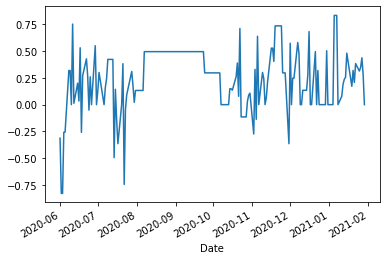

In [298]:
df['Avg Sentiment'].plot()

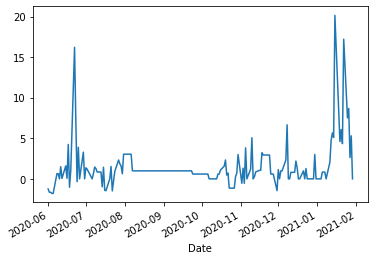

In [299]:
df['Total Sentiment'].plot()

In [306]:
df['Weekly Sentiment'] = df['Avg Sentiment'].rolling(5, win_type='triang').sum()

In [307]:
df['Monthly Sentiment'] = df['Avg Sentiment'].rolling(20, win_type='triang').sum()

In [308]:
df

,Adj Close,Volume,Surprise_EPS,Total Sentiment,Avg Sentiment,Weekly Sentiment,Monthly Sentiment
Date,,,,,,,
2020-06-01,80.059723,80791200.0,0.12,-1.2498,-0.312450,NaN,NaN
2020-06-02,80.430351,87642800.0,0.12,-1.6542,-0.827100,NaN,NaN
2020-06-03,80.873131,104491200.0,0.12,-1.6542,-0.827100,NaN,NaN
2020-06-04,80.176636,87560400.0,0.12,-1.7959,-0.256557,NaN,NaN
2020-06-05,82.460152,137250400.0,0.12,-1.7959,-0.256557,-1.739207,NaN
...,...,...,...,...,...,...,...
2021-01-25,142.706757,157611700.0,0.04,7.5164,0.313183,0.835643,3.201724
2021-01-26,142.946396,98390600.0,0.04,8.6724,0.346896,0.951122,3.174629
2021-01-27,141.848038,140843800.0,0.27,2.6192,0.436533,1.013862,3.159941


# Output prep

In [314]:
output = df['Adj Close']

In [330]:
output.rename('Stock Price')

Date
2020-06-01     80.059723
2020-06-02     80.430351
2020-06-03     80.873131
2020-06-04     80.176636
2020-06-05     82.460152
                 ...    
2021-01-25    142.706757
2021-01-26    142.946396
2021-01-27    141.848038
2021-01-28    136.885452
2021-01-29    131.763107
Name: Stock Price, Length: 169, dtype: float64

In [331]:
advance = df['Adj Close'].shift(10)
advance = advance.rename('Short Term Advance')
advance2 = df['Adj Close'].shift(40)
advance2 = advance2.rename('Mid Term Advance')

In [333]:
gt = pd.concat([output, advance, advance2], axis=1)

In [347]:
gt['Short Term Change'] = ((gt['Short Term Advance'] - gt['Adj Close'])/gt['Adj Close'])*100
gt['Mid Term Change'] = ((gt['Mid Term Advance'] - gt['Adj Close'])/gt['Adj Close'])*100

In [356]:
gt[9:110]

,Adj Close,Short Term Advance,Mid Term Advance,Short Term Change,Mid Term Change
Date,,,,,
2020-06-12,84.276009,NaN,NaN,NaN,NaN
2020-06-15,85.318260,80.059723,NaN,-6.163437,NaN
2020-06-16,87.579391,80.430351,NaN,-8.162925,NaN
2020-06-17,87.457504,80.873131,NaN,-7.528655,NaN
2020-06-18,87.492332,80.176636,NaN,-8.361529,NaN
...,...,...,...,...,...
2020-10-28,110.842850,120.800766,133.749039,8.983815,20.665464
2020-10-29,114.949615,120.322304,130.977966,4.673951,13.943806
2020-10-30,108.510361,118.637726,120.491753,9.333086,11.041703


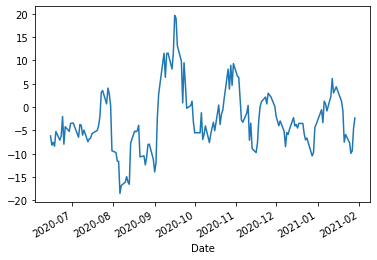

In [349]:
gt['Short Term Change'].plot()

In [399]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [379]:
avg_monthly_sentiment = df['Monthly Sentiment'].sum()/len(df['Monthly Sentiment'])
avg_week = df['Weekly Sentiment'].sum()/len(df['Monthly Sentiment'])

In [380]:
X = df[10:]
X['Monthly Sentiment'] =  X['Monthly Sentiment'].fillna(avg_monthly_sentiment)
X['Weekly Sentiment'] = X['Weekly Sentiment'].fillna(avg_week)

<ipython-input-380-166a1d57fa16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Monthly Sentiment'] =  X['Monthly Sentiment'].fillna(avg_monthly_sentiment)
<ipython-input-380-166a1d57fa16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weekly Sentiment'] = X['Weekly Sentiment'].fillna(avg_week)


In [418]:
Y = gt['Short Term Change'][10:]

In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [420]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [421]:
reg = MLPRegressor(hidden_layer_sizes=(5,15,5),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

/home/muditj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [423]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.7653496582709012


In [424]:
import matplotlib.pyplot as plt

In [440]:
y_pred = pd.DataFrame(y_pred)

In [441]:
out = pd.concat([y_test.reset_index(drop=True),y_pred.reset_index(drop=True)], axis=1)

In [445]:
out = out.rename(columns={0:"Prediction", "Short Term Change":"Ground Truth"})

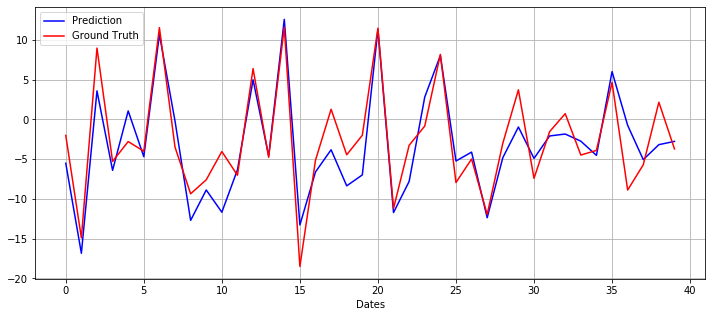

In [449]:
plt.figure(figsize=(12,5))
plt.xlabel('Dates')

ax1 = out["Prediction"].plot(color='blue', grid=True)
ax2 = out["Ground Truth"].plot(color='red', grid=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()


In [467]:
X = df[40:]
X['Monthly Sentiment'] =  X['Monthly Sentiment'].fillna(avg_monthly_sentiment)
X['Weekly Sentiment'] = X['Weekly Sentiment'].fillna(avg_week)

<ipython-input-467-d24fc33370a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Monthly Sentiment'] =  X['Monthly Sentiment'].fillna(avg_monthly_sentiment)
<ipython-input-467-d24fc33370a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weekly Sentiment'] = X['Weekly Sentiment'].fillna(avg_week)


In [468]:
Y = gt['Mid Term Change'][40:]

In [470]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [471]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [472]:
reg = MLPRegressor(hidden_layer_sizes=(5,15,5),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

/home/muditj/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [473]:
y_pred=reg.predict(X_testscaled)
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.9110321707038223


In [474]:
import matplotlib.pyplot as plt

In [476]:
y_pred = pd.DataFrame(y_pred)
out = pd.concat([y_test.reset_index(drop=True),y_pred.reset_index(drop=True)], axis=1)

In [480]:
out = out.rename(columns={0:"Prediction", "Mid Term Change":"Ground Truth"})

In [481]:
out

,Ground Truth,Prediction
0,-13.102441,-13.122181
1,-27.701260,-30.240141
2,-19.424253,-15.312422
3,-1.704786,-0.368340
4,-24.559469,-21.038396
5,-14.269011,-14.511404
6,-4.688019,-5.048102
7,-11.118523,-13.008618
8,-0.996115,-2.916172
9,-22.556572,-22.148238


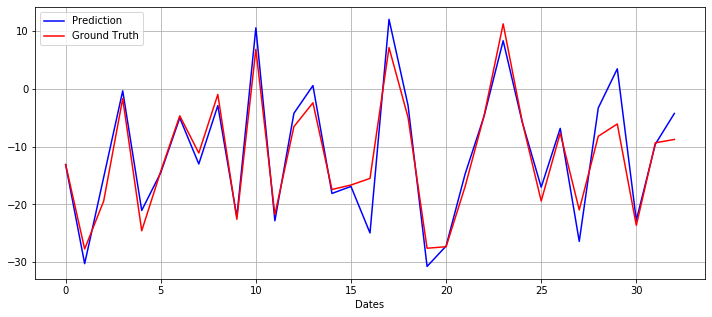

In [482]:
plt.figure(figsize=(12,5))
plt.xlabel('Dates')

ax1 = out["Prediction"].plot(color='blue', grid=True)
ax2 = out["Ground Truth"].plot(color='red', grid=True)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)
plt.show()
